# Classification using Logisitic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from acquire import get_titanic_data
from prepare import prep_titanic    

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from model_evaluation_functions import *


import warnings
warnings.filterwarnings("ignore")

In [2]:
df_titanic = prep_titanic()

In [3]:
df_titanic.head()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone,Queenstown,Southampton,Second,Third,male
0,0,0,3,22.0,1,0,7.2500,0,0,1,0,1,1
1,1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,2,1,3,26.0,0,0,7.9250,1,0,1,0,1,0
3,3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0
4,4,0,3,35.0,0,0,8.0500,1,0,1,0,1,1


In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   age           714 non-null    float64
 4   sibsp         891 non-null    int64  
 5   parch         891 non-null    int64  
 6   fare          891 non-null    float64
 7   alone         891 non-null    int64  
 8   Queenstown    891 non-null    uint8  
 9   Southampton   891 non-null    uint8  
 10  Second        891 non-null    uint8  
 11  Third         891 non-null    uint8  
 12  male          891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(5)
memory usage: 60.2 KB


In [5]:
df_titanic.select_dtypes(exclude='O')

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone,Queenstown,Southampton,Second,Third,male
0,0,0,3,22.0,1,0,7.2500,0,0,1,0,1,1
1,1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,2,1,3,26.0,0,0,7.9250,1,0,1,0,1,0
3,3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0
4,4,0,3,35.0,0,0,8.0500,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,27.0,0,0,13.0000,1,0,1,1,0,1
887,887,1,1,19.0,0,0,30.0000,1,0,1,0,0,0
888,888,0,3,NaN,1,2,23.4500,0,0,1,0,1,0
889,889,1,1,26.0,0,0,30.0000,1,0,0,0,0,1


In [6]:
df_titanic.dropna(how='any',
                  subset=['age'],
                  inplace=True)

# Test Models
## _Model 1_

In [90]:
# X = df_titanic.loc[:, 'fare':'class_Third']
X = df_titanic[['pclass','age','fare','sibsp','parch']]
y = df_titanic['survived']

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X,
                                                                      y,
                                                                      test_size=.2,
                                                                      random_state=123
                                                                      )

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate,
                                                            y_train_validate,
                                                            test_size=.3,
                                                            random_state=123
                                                            )


print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (399, 5) , validate:  (172, 5) , test:  (143, 5)
train:  (399,) , validate:  (172,) , test:  (143,)


In [91]:
logit_test_model_1 = LogisticRegression(C=1,
                                   class_weight={0:1, 1:99},
                                   random_state=123,
                                   intercept_scaling=1,
                                   solver='lbfgs'
                                   )

In [92]:
logit_test_model_1.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 99}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
print('Coefficient: \n', logit_test_model_1.coef_)
print('Intercept: \n', logit_test_model_1.intercept_)

Coefficient: 
 [[-1.16035326 -0.03110108  0.00399115 -0.45129797  0.52083144]]
Intercept: 
 [7.65390045]


In [94]:
y_pred = logit_test_model_1.predict(X_train)
y_pred_proba = logit_test_model_1.predict_proba(X_train)

In [95]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit_test_model_1.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.43


In [96]:
print(confusion_matrix(y_train, y_pred))

[[  0 228]
 [  0 171]]


In [97]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       228
           1       0.43      1.00      0.60       171

    accuracy                           0.43       399
   macro avg       0.21      0.50      0.30       399
weighted avg       0.18      0.43      0.26       399



## _Model 2_

In [98]:
logit_test_model_2 = LogisticRegression(C=.1,
class_weight={0:1, 1:99},
random_state=123,
intercept_scaling=1,
solver='lbfgs')

In [99]:
logit_test_model_2.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight={0: 1, 1: 99}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
print('Coefficient: \n', logit_test_model_2.coef_)
print('Intercept: \n', logit_test_model_2.intercept_)

Coefficient: 
 [[-1.00329345 -0.02877517  0.00604013 -0.40518742  0.44919365]]
Intercept: 
 [7.14670159]


In [101]:
y_pred2 = logit_test_model_2.predict(X_train)
y_pred_proba2 = logit_test_model_2.predict_proba(X_train)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit_test_model_2.score(X_train, y_train)))

print(confusion_matrix(y_train, y_pred2))

print(classification_report(y_train, y_pred2))

Accuracy of Logistic Regression classifier on training set: 0.43
[[  0 228]
 [  0 171]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       228
           1       0.43      1.00      0.60       171

    accuracy                           0.43       399
   macro avg       0.21      0.50      0.30       399
weighted avg       0.18      0.43      0.26       399



# Logistic Regression Exercises

## 1.
Start by defining your baseline model. 

## 2.
Create another model that includes `age` in addition to `fare` and `pclass`. Does this model perform better than your previous one?
### Model 1

In [102]:
X = df_titanic[['pclass', 'age', 'fare']]
y = df_titanic['survived']

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X,
                                                                      y,
                                                                      test_size=.2,
                                                                      random_state=123
                                                                      )

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate,
                                                            y_train_validate,
                                                            test_size=.3,
                                                            random_state=123
                                                            )


print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (399, 3) , validate:  (172, 3) , test:  (143, 3)
train:  (399,) , validate:  (172,) , test:  (143,)


In [103]:
logit = LogisticRegression(random_state=123, solver='lbfgs')

In [104]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

print(confusion_matrix(y_train, y_pred))

print(classification_report(y_train, y_pred))

Coefficient: 
 [[-1.00444388 -0.02941366  0.00518596]]
Intercept: 
 [2.60928736]
Accuracy of Logistic Regression classifier on training set: 0.70
[[191  37]
 [ 81  90]]
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       228
           1       0.71      0.53      0.60       171

    accuracy                           0.70       399
   macro avg       0.71      0.68      0.68       399
weighted avg       0.70      0.70      0.70       399



## 3.
Include `sex` in your model as well.
> Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

### Model 2

In [106]:
X = df_titanic[['pclass', 'age', 'fare', 'male']]
y = df_titanic['survived']

X_train_validate2, X_test2, y_train_validate2, y_test2 = train_test_split(X,
                                                                      y,
                                                                      test_size=.2,
                                                                      random_state=123
                                                                      )

X_train2, X_validate2, y_train2, y_validate2 = train_test_split(X_train_validate,
                                                            y_train_validate,
                                                            test_size=.3,
                                                            random_state=123
                                                            )


print("train: ", X_train2.shape, ", validate: ", X_validate2.shape, ", test: ", X_test2.shape)
print("train: ", y_train2.shape, ", validate: ", y_validate2.shape, ", test: ", y_test2.shape)

train:  (399, 3) , validate:  (172, 3) , test:  (143, 4)
train:  (399,) , validate:  (172,) , test:  (143,)


In [107]:
logit_2 = LogisticRegression(random_state=123, intercept_scaling=1, solver='lbfgs')

In [108]:
logit_2.fit(X_train2, y_train2)

print('Coefficient: \n', logit_2.coef_)
print('Intercept: \n', logit_2.intercept_)

y_pred2 = logit_2.predict(X_train2)
y_pred_proba2 = logit_2.predict_proba(X_train2)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit_2.score(X_train2, y_train2)))

print(confusion_matrix(y_train2, y_pred2))

print(classification_report(y_train2, y_pred2))

Coefficient: 
 [[-1.00444388 -0.02941366  0.00518596]]
Intercept: 
 [2.60928736]
Accuracy of Logistic Regression classifier on training set: 0.70
[[191  37]
 [ 81  90]]
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       228
           1       0.71      0.53      0.60       171

    accuracy                           0.70       399
   macro avg       0.71      0.68      0.68       399
weighted avg       0.70      0.70      0.70       399



## 4.
Try out other combinations of features and models.

### Model 3

In [109]:
X = df_titanic[['pclass', 'age', 'fare', 'male', 'Queenstown', 'Southampton']]
y = df_titanic['survived']

X_train_validate3, X_test3, y_train_validate3, y_test3 = train_test_split(X,
                                                                          y,
                                                                          test_size=.2,
                                                                          random_state=123
                                                                          )

X_train3, X_validate3, y_train3, y_validate3 = train_test_split(X_train_validate3,
                                                            y_train_validate3,
                                                            test_size=.3,
                                                            random_state=123
                                                            )


print("train: ", X_train3.shape, ", validate: ", X_validate3.shape, ", test: ", X_test3.shape)
print("train: ", y_train3.shape, ", validate: ", y_validate3.shape, ", test: ", y_test3.shape)

train:  (399, 6) , validate:  (172, 6) , test:  (143, 6)
train:  (399,) , validate:  (172,) , test:  (143,)


In [110]:
logit_3 = LogisticRegression(random_state=123, solver='lbfgs')

In [111]:
logit_3.fit(X_train3, y_train3)

print('Coefficient: \n', logit_3.coef_)
print('Intercept: \n', logit_3.intercept_)

y_pred3 = logit_3.predict(X_train3)
y_pred_proba3 = logit_3.predict_proba(X_train3)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit_3.score(X_train3, y_train3)))

print(confusion_matrix(y_train3, y_pred3))

print(classification_report(y_train3, y_pred3))

Coefficient: 
 [[-1.05899184e+00 -2.77741850e-02  2.50423675e-03 -2.53771314e+00
  -9.11492204e-01 -4.04828933e-01]]
Intercept: 
 [4.71610197]
Accuracy of Logistic Regression classifier on training set: 0.81
[[196  32]
 [ 44 127]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       228
           1       0.80      0.74      0.77       171

    accuracy                           0.81       399
   macro avg       0.81      0.80      0.80       399
weighted avg       0.81      0.81      0.81       399



### Model 4

In [112]:
X = df_titanic[['fare', 'male']]
y = df_titanic['survived']

X_train_validate4, X_test4, y_train_validate4, y_test4 = train_test_split(X,
                                                                      y,
                                                                      test_size=.2,
                                                                      random_state=123
                                                                      )

X_train4, X_validate4, y_train4, y_validate4 = train_test_split(X_train_validate4,
                                                            y_train_validate4,
                                                            test_size=.3,
                                                            random_state=123
                                                            )


print("train: ", X_train4.shape, ", validate: ", X_validate4.shape, ", test: ", X_test4.shape)
print("train: ", y_train4.shape, ", validate: ", y_validate4.shape, ", test: ", y_test4.shape)

train:  (399, 2) , validate:  (172, 2) , test:  (143, 2)
train:  (399,) , validate:  (172,) , test:  (143,)


In [113]:
logit_4 = LogisticRegression(random_state=123, solver='lbfgs')

In [114]:
logit_4.fit(X_train4, y_train4)

print('Coefficient: \n', logit_4.coef_)
print('Intercept: \n', logit_4.intercept_)

y_pred4 = logit_4.predict(X_train4)
y_pred_proba4 = logit_4.predict_proba(X_train4)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit_4.score(X_train4, y_train4)))

print(confusion_matrix(y_train4, y_pred4))

print(classification_report(y_train4, y_pred4))

Coefficient: 
 [[ 0.01527599 -2.44659372]]
Intercept: 
 [0.74930988]
Accuracy of Logistic Regression classifier on training set: 0.79
[[196  32]
 [ 51 120]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       228
           1       0.79      0.70      0.74       171

    accuracy                           0.79       399
   macro avg       0.79      0.78      0.78       399
weighted avg       0.79      0.79      0.79       399



## 5.
Use the best 3 models to predict and evaluate on the validate sample.

In [115]:
print("Accuracy Scores")
print('-' * 15)
print(f"Model 2: {logit_2.score(X_train2, y_train2):.2%}")
print(f"Model 3: {logit_3.score(X_train3, y_train3):.2%}")
print(f"Model 4: {logit_4.score(X_train4, y_train4):.2%}")

Accuracy Scores
---------------
Model 2: 70.43%
Model 3: 80.95%
Model 4: 79.20%


In [116]:
y_pred2 = logit_2.predict(X_validate2)
y_pred3 = logit_3.predict(X_validate3)
y_pred4 = logit_4.predict(X_validate4)

print("Model 2: solver = lbfgs, c = 1")

print('Accuracy: {:.3f}'.format(logit_2.score(X_validate2, y_validate2)))

print(confusion_matrix(y_validate2, y_pred2))

print(classification_report(y_validate2, y_pred2))

print("Model 3: solver = lbfgs, c = 1")

print('Accuracy: {:.3f}'.format(logit_3.score(X_validate3, y_validate3)))

print(confusion_matrix(y_validate3, y_pred3))

print(classification_report(y_validate3, y_pred3))

print("Model 4: solver = lbfgs, c = 1")

print('Accuracy: {:.3f}'.format(logit_4.score(X_validate4, y_validate4)))

print(confusion_matrix(y_validate4, y_pred4))

print(classification_report(y_validate4, y_pred4))


Model 2: solver = lbfgs, c = 1
Accuracy: 0.727
[[88 21]
 [26 37]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       109
           1       0.64      0.59      0.61        63

    accuracy                           0.73       172
   macro avg       0.70      0.70      0.70       172
weighted avg       0.72      0.73      0.72       172

Model 3: solver = lbfgs, c = 1
Accuracy: 0.779
[[85 24]
 [14 49]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       109
           1       0.67      0.78      0.72        63

    accuracy                           0.78       172
   macro avg       0.76      0.78      0.77       172
weighted avg       0.79      0.78      0.78       172

Model 4: solver = lbfgs, c = 1
Accuracy: 0.779
[[89 20]
 [18 45]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       109
           1       0.69      0.71      

##  6.
Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train? 

In [117]:
y_pred3 = logit_3.predict(X_test3)

print("Model 4: solver = lbfgs, c = 1")

print('Accuracy: {:.3f}'.format(logit_3.score(X_test3, y_test3)))

print(confusion_matrix(y_test3, y_pred3))

print(classification_report(y_test3, y_pred3))

Model 4: solver = lbfgs, c = 1
Accuracy: 0.755
[[68 19]
 [16 40]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.80        87
           1       0.68      0.71      0.70        56

    accuracy                           0.76       143
   macro avg       0.74      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143



# Decision Tree Classification - Examples

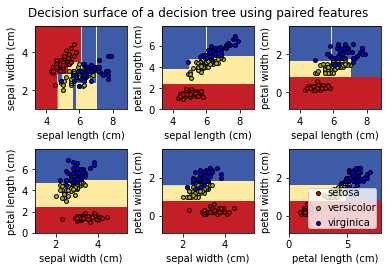

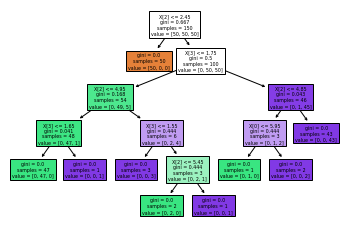

In [118]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

# Decision Tree Exercises

In [119]:
X = df_titanic.drop(columns='survived')
y = df_titanic[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X,
                                                                      y,
                                                                      test_size=.2,
                                                                      random_state=123,
                                                                      stratify = y.survived)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate,
                                                            y_train_validate,
                                                            test_size=.3,
                                                            random_state=123,
                                                            stratify = y_train_validate.survived
                                                            )


print("train:", X_train.shape, "validate:", X_validate.shape, "test:", X_test.shape)
print("train:", y_train.shape, "validate:", y_validate.shape, "test:", y_test.shape)

train: (399, 12) validate: (172, 12) test: (143, 12)
train: (399, 1) validate: (172, 1) test: (143, 1)


## 1.
Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [120]:
tree_clf = DecisionTreeClassifier()

In [121]:
tree_clf = tree_clf.fit(X_train, y_train)
y_prediction_train = tree_clf.predict(X_train)

## 2.
Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [122]:
# dt is abbreviated for Decision Tree
# m1 is abbreviated for Model 1
dt_m1_accuracy = tree_clf.score(X_train, y_train)

print(f"Model 1 Accuracy Score {dt_m1_accuracy:.2%}")

Model 1 Accuracy Score 100.00%


In [123]:
# cm is abbreviated for confusion matrix
cm_ml_1 = pd.DataFrame(confusion_matrix(y_train, y_prediction_train))
cm_ml_1

,0,1
0,237,0
1,0,162


In [124]:
print('Model 1')
report = pd.DataFrame(classification_report(y_train, y_prediction_train, output_dict=True))
report

Model 1


,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,237.0,162.0,1.0,399.0,399.0


## 3.
Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [125]:
model_1 = evaluation_metrics(cm_ml_1, model_number=1)
model_1

,Model 1
Accuracy,100.0
True Positive Rate,100.0
False Positive Rate,0.0
True Negative Rate,100.0
False Negative Rate,0.0
Precision,100.0
Recall,100.0
F1 Score,100.0


In [126]:
support = pd.DataFrame(report.iloc[3,:2]).T
support

,0,1
support,237.0,162.0


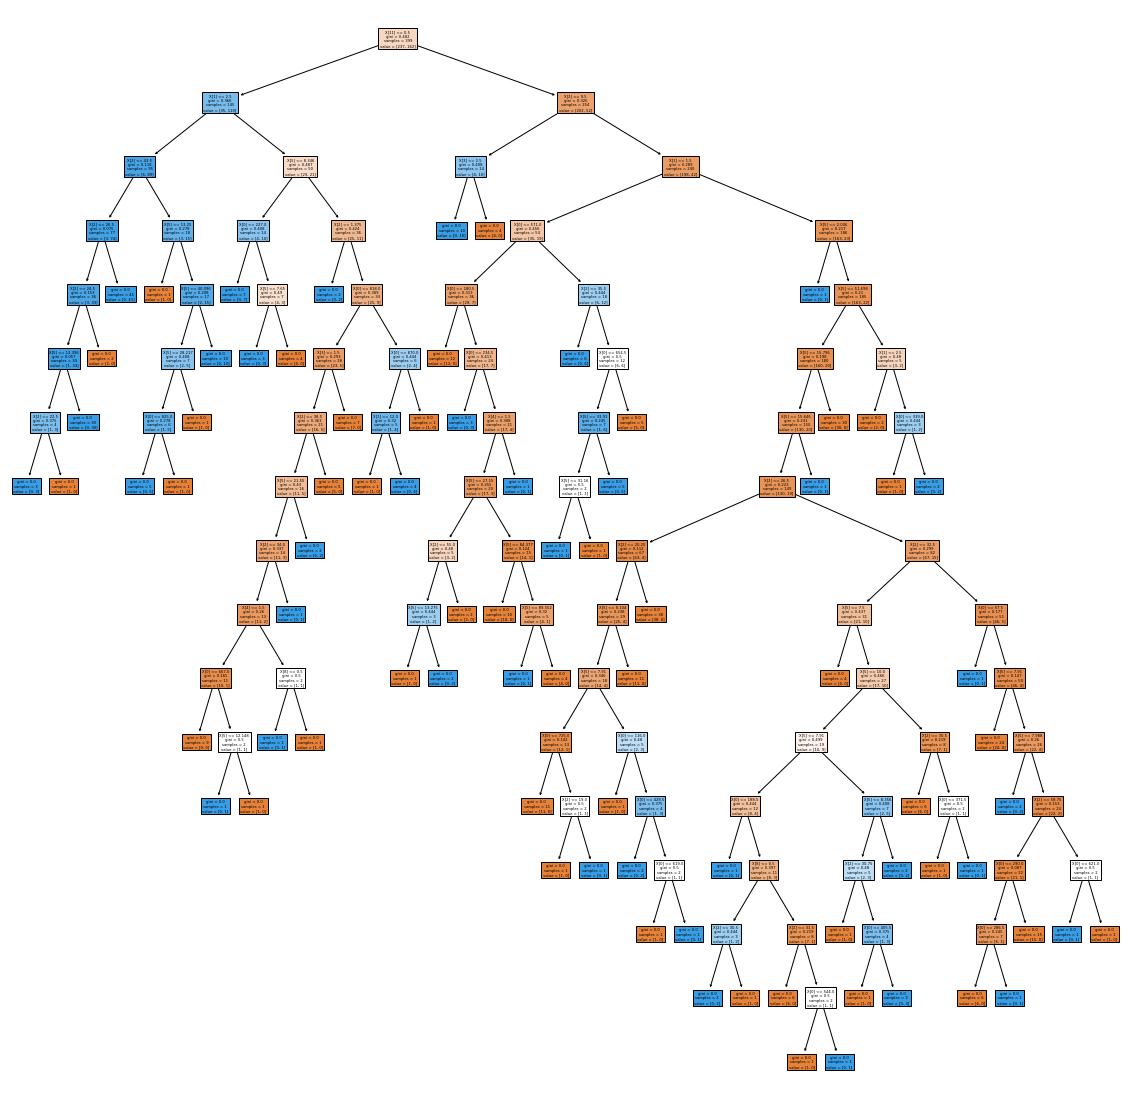

In [127]:
plt.figure(figsize=(20,20))
tree.plot_tree(tree_clf, filled=True);

## 4.
Run through steps 2-4 using a different max_depth value.

In [128]:
# DecisionTreeClassifier?

In [129]:
clf_2 = DecisionTreeClassifier(max_depth=3)

clf_2 = clf_2.fit(X_train, y_train)
y_2_prediction_train = clf_2.predict(X_train)

In [130]:
# dt is abbreviated for Decision Tree
# m1 is abbreviated for Model 1
dt_m2_accuracy = clf_2.score(X_train, y_train)

print(f"Model 2 Accuracy Score {dt_m2_accuracy:.2%}")

Model 2 Accuracy Score 84.21%


In [131]:
# cm is abbreviated for confusion matrix
cm_ml_2 = pd.DataFrame(confusion_matrix(y_train, y_2_prediction_train))
cm_ml_2

,0,1
0,227,10
1,53,109


In [132]:
print('Model 2: Max Depth=3')
pd.DataFrame(classification_report(y_train, y_2_prediction_train, output_dict=True))

Model 2: Max Depth=3


,0,1,accuracy,macro avg,weighted avg
precision,0.810714,0.915966,0.842105,0.863340,0.853448
recall,0.957806,0.672840,0.842105,0.815323,0.842105
f1-score,0.878143,0.775801,0.842105,0.826972,0.836591
support,237.000000,162.000000,0.842105,399.000000,399.000000


In [133]:
model_2 = evaluation_metrics(cm_ml_2, model_number=2)
model_2

,Model 2
Accuracy,84.210526
True Positive Rate,91.596639
False Positive Rate,18.928571
True Negative Rate,81.071429
False Negative Rate,8.403361
Precision,67.283951
Recall,91.596639
F1 Score,77.580071


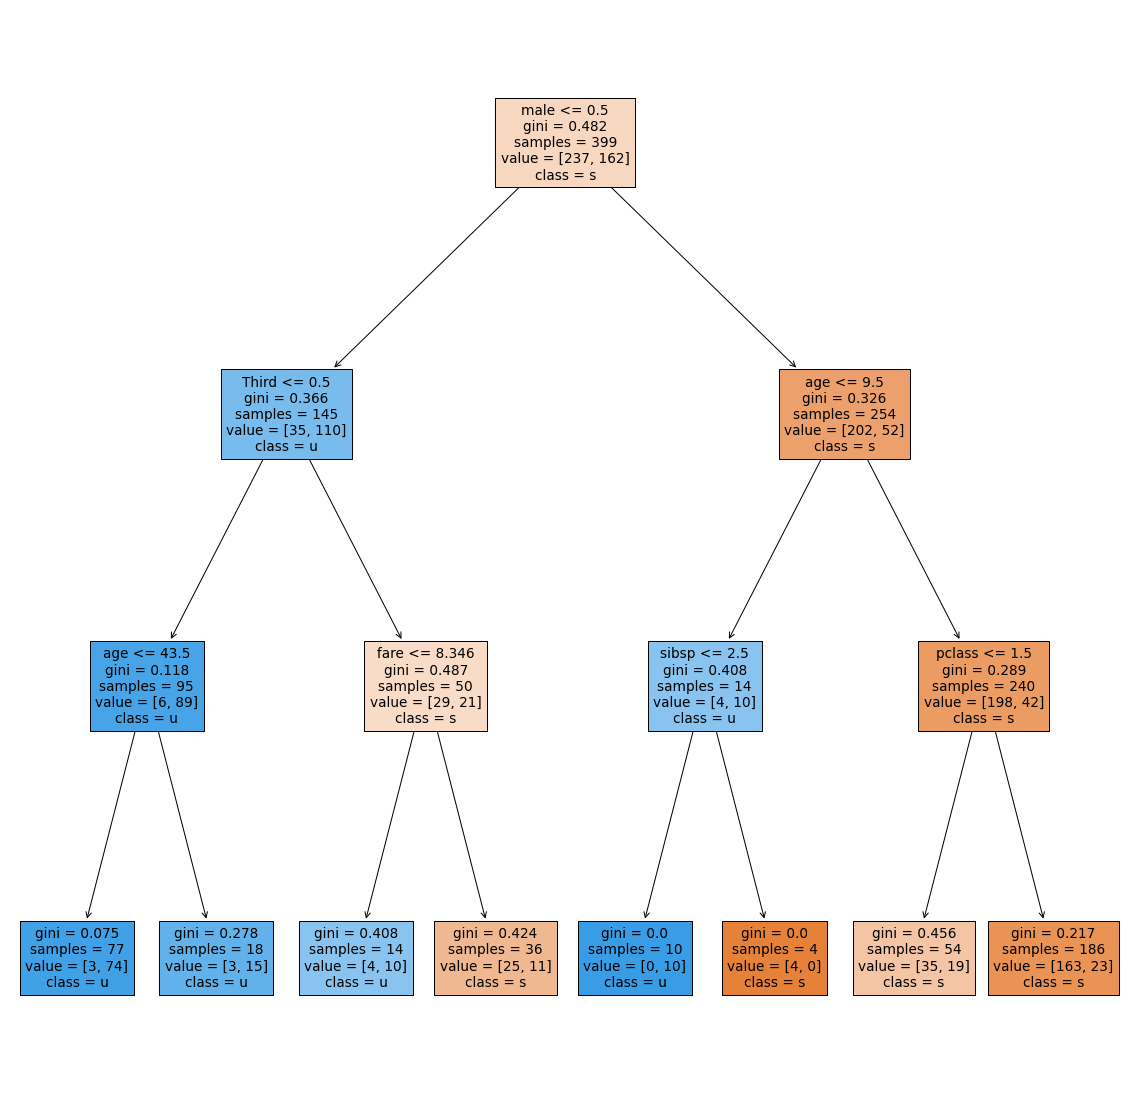

In [134]:
features = df_titanic.drop(columns='survived').columns.to_list()

plt.figure(figsize=(20,20))
tree.plot_tree(clf_2, filled=True, feature_names=features, class_names='survived');

## 5.
Which performs better on your in-sample data?

In [135]:
summary = pd.concat([model_1, model_2], axis=1)
summary

,Model 1,Model 2
Accuracy,100.0,84.210526
True Positive Rate,100.0,91.596639
False Positive Rate,0.0,18.928571
True Negative Rate,100.0,81.071429
False Negative Rate,0.0,8.403361
Precision,100.0,67.283951
Recall,100.0,91.596639
F1 Score,100.0,77.580071


Using metric scores alone, Model 1 performs 'better' on in-sample data. Model 1 has overfit itself to the training data. If we take overfitting into account Model 2 performs better because it is able to generalize to future data.

# Random Forest Exercises

## 1.
Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting `min_samples_leaf = 1` and `max_depth = 20`.

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
rf = RandomForestClassifier(min_samples_leaf=1, max_depth=20)

In [138]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## 2.
Evaluate your results using the model score, confusion matrix, and classification report.

In [139]:
print("Random Forest Score:", rf.score(X_train, y_train)*100)

Random Forest Score: 100.0


In [140]:
rf_y_pred = rf.predict(X_train)
cm_rf = pd.DataFrame(confusion_matrix(y_train, rf_y_pred))
cm_rf

,0,1
0,237,0
1,0,162


In [141]:
report = pd.DataFrame(classification_report(y_train,
                                   rf_y_pred,
                                   output_dict=True))
report

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,237.0,162.0,1.0,399.0,399.0


## 3.
Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [142]:
rf_evaluation = evaluation_metrics(cm_rf,
                                   model_number='1 Random Forest'
                                  )
rf_evaluation

,Model 1 Random Forest
Accuracy,100.0
True Positive Rate,100.0
False Positive Rate,0.0
True Negative Rate,100.0
False Negative Rate,0.0
Precision,100.0
Recall,100.0
F1 Score,100.0


In [143]:
pd.DataFrame(report.iloc[3,:2]).T

,0,1
support,237.0,162.0


## 4
Run through steps increasing your `min_samples_leaf` to 5 and decreasing your `max_depth` to 3.

In [144]:
rf_2 = RandomForestClassifier(min_samples_leaf=5, max_depth=3)

In [145]:
rf_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [146]:
print("Random Forest 2 Score", \
      + round(rf_2.score(X_train, y_train)*100, 2))

Random Forest 2 Score 81.95


In [147]:
rf2_y_pred = rf_2.predict(X_train)
cm_rf2 = pd.DataFrame(confusion_matrix(y_train, rf2_y_pred))
cm_rf2

,0,1
0,231,6
1,66,96


In [148]:
report_2 = pd.DataFrame(
    classification_report(y_train,
                          rf2_y_pred,
                          output_dict=True
                         ))
report_2

,0,1,accuracy,macro avg,weighted avg
precision,0.777778,0.941176,0.819549,0.859477,0.844120
recall,0.974684,0.592593,0.819549,0.783638,0.819549
f1-score,0.865169,0.727273,0.819549,0.796221,0.809181
support,237.000000,162.000000,0.819549,399.000000,399.000000


In [149]:
rf_2_evaluation = evaluation_metrics(cm_rf2,
                                     model_number='Random Forest 2')
rf_2_evaluation

,Model Random Forest 2
Accuracy,81.954887
True Positive Rate,94.117647
False Positive Rate,22.222222
True Negative Rate,77.777778
False Negative Rate,5.882353
Precision,59.259259
Recall,94.117647
F1 Score,72.727273


## 5.
What are the differences in the evaluation metrics?
> Yes. Random Forest #1 "outperforms" Random Forest #2.

Which performs better on your in-sample data? Why?

> Random Forest #1 performs the best because it is allowed to overfit the training data. `min_sample_leaves` of Random Forest #1 is set to 1. This allows the model to correctly classify an observation with granular detail. So granular in fact, that it will not generalize well if introduced to new data.

In [150]:
pd.concat([rf_evaluation, rf_2_evaluation], axis=1)

,Model 1 Random Forest,Model Random Forest 2
Accuracy,100.0,81.954887
True Positive Rate,100.0,94.117647
False Positive Rate,0.0,22.222222
True Negative Rate,100.0,77.777778
False Negative Rate,0.0,5.882353
Precision,100.0,59.259259
Recall,100.0,94.117647
F1 Score,100.0,72.727273


# KNearestNeighbors Exercises

## 1.
Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [151]:
from sklearn.neighbors import KNeighborsClassifier

In [152]:
knn = KNeighborsClassifier()

In [153]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# 2.
Evaluate your results using the model score, confusion matrix, and classification report.

In [154]:
print("KNN Score", \
      + round(knn.score(X_train, y_train)*100, 2))

KNN Score 73.43


In [155]:
knn_y_pred = knn.predict(X_train)
cm_knn = pd.DataFrame(confusion_matrix(y_train, knn_y_pred))
cm_knn

,0,1
0,208,29
1,77,85


In [156]:
knn_report = pd.DataFrame(
    classification_report(y_train,
                          knn_y_pred,
                          output_dict=True
                         ))
knn_report

,0,1,accuracy,macro avg,weighted avg
precision,0.729825,0.745614,0.734336,0.737719,0.736235
recall,0.877637,0.524691,0.734336,0.701164,0.734336
f1-score,0.796935,0.615942,0.734336,0.706438,0.723449
support,237.000000,162.000000,0.734336,399.000000,399.000000


## 3.
Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [157]:
knn1_eval = evaluation_metrics(cm_knn, '1 - KNN')
knn1_eval

,Model 1 - KNN
Accuracy,73.433584
True Positive Rate,74.561404
False Positive Rate,27.017544
True Negative Rate,72.982456
False Negative Rate,25.438596
Precision,52.469136
Recall,74.561404
F1 Score,61.594203


## 4.
Run through steps 2-4 setting k to 10

In [158]:
knn2 = KNeighborsClassifier(n_neighbors=10)
knn2.fit(X_train, y_train)
knn2_y_pred = knn2.predict(X_train)

In [159]:
print("KNN 2 Score:", \
      round(knn2.score(X_train, y_train)*100, 2))

KNN 2 Score: 70.18


In [160]:
cm_knn2 = pd.DataFrame(confusion_matrix(y_train, knn2_y_pred))
cm_knn2

,0,1
0,226,11
1,108,54


In [161]:
knn2_report = pd.DataFrame(
    classification_report(y_train,
                          knn2_y_pred,
                          output_dict=True
                         )
)

knn2_report

,0,1,accuracy,macro avg,weighted avg
precision,0.676647,0.830769,0.701754,0.753708,0.739223
recall,0.953586,0.333333,0.701754,0.643460,0.701754
f1-score,0.791594,0.475771,0.701754,0.633682,0.663365
support,237.000000,162.000000,0.701754,399.000000,399.000000


In [162]:
knn2_eval = evaluation_metrics(cm_knn2, "2 - KNN")
knn2_eval

,Model 2 - KNN
Accuracy,70.175439
True Positive Rate,83.076923
False Positive Rate,32.335329
True Negative Rate,67.664671
False Negative Rate,16.923077
Precision,33.333333
Recall,83.076923
F1 Score,47.577093


## 5.
Run through setps 2-4 setting k to 20

In [163]:
knn3 = KNeighborsClassifier(n_neighbors=20)
knn3.fit(X_train, y_train)
knn3_y_pred = knn3.predict(X_train)

In [164]:
print("KNN 3 Score:", \
      round(knn3.score(X_train, y_train)*100, 2))

KNN 3 Score: 67.92


In [165]:
cm_knn3 = pd.DataFrame(confusion_matrix(y_train, knn3_y_pred))
cm_knn3

,0,1
0,226,11
1,117,45


In [166]:
knn3_report = pd.DataFrame(
    classification_report(y_train,
                          knn3_y_pred,
                          output_dict=True
                         )
)

knn3_report

,0,1,accuracy,macro avg,weighted avg
precision,0.658892,0.803571,0.679198,0.731232,0.717634
recall,0.953586,0.277778,0.679198,0.615682,0.679198
f1-score,0.779310,0.412844,0.679198,0.596077,0.630520
support,237.000000,162.000000,0.679198,399.000000,399.000000


In [167]:
knn3_eval = evaluation_metrics(cm_knn3, '3 - KNN')
knn3_eval

,Model 3 - KNN
Accuracy,67.919799
True Positive Rate,80.357143
False Positive Rate,34.110787
True Negative Rate,65.889213
False Negative Rate,19.642857
Precision,27.777778
Recall,80.357143
F1 Score,41.284404


## 6.
What are the differences in the evaluation metrics?
> The less neighbors there are, the higher the True Negative Rate. There is also a lower True Positive Rate.

Which performs better on your in-sample data? Why?

In [168]:
knn_summary = pd.concat([knn1_eval, knn2_eval, knn3_eval], axis=1)
knn_summary

,Model 1 - KNN,Model 2 - KNN,Model 3 - KNN
Accuracy,73.433584,70.175439,67.919799
True Positive Rate,74.561404,83.076923,80.357143
False Positive Rate,27.017544,32.335329,34.110787
True Negative Rate,72.982456,67.664671,65.889213
False Negative Rate,25.438596,16.923077,19.642857
Precision,52.469136,33.333333,27.777778
Recall,74.561404,83.076923,80.357143
F1 Score,61.594203,47.577093,41.284404


# Test
> For both the iris and the titanic data
## 1.
Determine which model (with hyperparameters) performs the best (try reducing the number of features to the top 4 features in terms of information gained for each feature individually).

## Titanic

In [179]:
X = df_titanic[['fare', 'male', 'pclass', 'age']]
y = df_titanic[['survived']]

X_train_validate4, X_test4, y_train_validate4, y_test4 = train_test_split(X,
                                                                          y,
                                                                          test_size=.2,
                                                                          random_state=123,
                                                                          stratify=y.survived)

X_train4, X_validate4, y_train4, y_validate4 = train_test_split(X_train_validate4,
                                                            y_train_validate4,
                                                            test_size=.3,
                                                            random_state=123,
                                                            stratify=y_train_validate4.survived
                                                            )


print("train: ", X_train4.shape, ", validate: ", X_validate4.shape, ", test: ", X_test4.shape)
print("train: ", y_train4.shape, ", validate: ", y_validate4.shape, ", test: ", y_test4.shape)

train:  (399, 4) , validate:  (172, 4) , test:  (143, 4)
train:  (399, 1) , validate:  (172, 1) , test:  (143, 1)


### Random Forest

In [235]:
n_estimators = range(1, 21)
scores = []
v_scores = []
rf_scores = []
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n, n_jobs=10)
    rf.fit(X_train4, y_train4)
    scores.append(rf.score(X_train4, y_train4))
    v_scores.append(rf.score(X_validate4, y_validate4))
    rf_scores.append(rf.score(X_test4, y_test4))

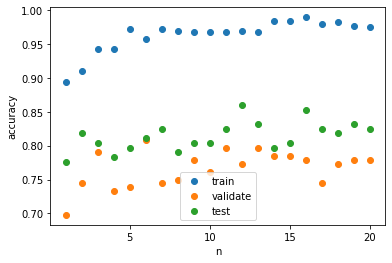

In [226]:
plt.figure()
plt.xlabel('n')
plt.ylabel('accuracy')
plt.scatter(n_estimators, scores, label='train')
plt.scatter(n_estimators, v_scores, label='validate')
plt.scatter(n_estimators, t_scores, label='test')
plt.legend()
plt.xticks([5, 10, 15, 20]);

In [252]:
rf_scores = pd.Series(rf_scores)
best_n_estimators = rf_scores.idxmax()
rf_best_accuracy = round(rf_scores[rf_scores.idxmax()], 4)

In [253]:
print("Random Forest achieves the highest test score with n_estimators=" \
      + str(best_n_estimators))

print(f"Random Forest best accuracy {rf_best_accuracy:.2%}")

Random Forest achieves the highest test score with n_estimators=11
Random Forest best accuracy 85.31%


### KNN

In [254]:
k_range = range(1, 21)
scores = []
v_scores = []
knn_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs=10)
    knn.fit(X_train4, y_train4)
    scores.append(knn.score(X_train4, y_train4))
    v_scores.append(knn.score(X_validate4, y_validate4))
    knn_scores.append(knn.score(X_test4, y_test4))

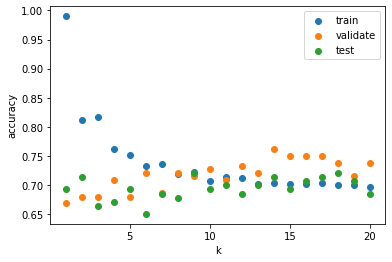

In [206]:
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores, label='train')
plt.scatter(k_range, v_scores, label='validate')
plt.scatter(k_range, t_scores, label='test')
plt.legend()
plt.xticks([5, 10, 15, 20]);

In [256]:
knn_scores = pd.Series(knn_scores)
best_n_neighbors = knn_scores.idxmax()
knn_best_accuracy = round(knn_scores[knn_scores.idxmax()], 4)

In [257]:
print("KNN achieves the highest test score with n_estimators=" \
      + str(best_n_neighbors))

print(f"KNN best accuracy {knn_best_accuracy:.2%}")

KNN achieves the highest test score with n_estimators=8
KNN best accuracy 72.03%


## 2.
Create a new dataframe with top 4 features.

## 3.
Use the top performing algorithm with the metaparameters used in that model. Create the object, fit, transform on in-sample data, and evaluate the results with the training data. Compare your evaluation metrics with those from the original model (with all the features).

## 4.
Run your final model on your out-of-sample dataframe (test_df). Evaluate the results.

# Feature Engineering

## 1. 
> Titanic Data

Create a feature named who, this should be either man, woman, or child. How does including this feature affect your model's performance?

Create a feature named adult_male that is either a 1 or a 0. How does this affect your model's predictions?

## 2.
> Iris Data

Create features named petal_area and sepal_area.